In [8]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

## Data Preprocessing

In [9]:
# Reading the data
df = pd.read_csv('Steel_industry_data.csv')
df.drop(columns=['NSM'], inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Current_Reactive_Power_kVarh', 'CO2(tCO2)' : 'CO2'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df.set_index('date', inplace=True)
df_num = df.select_dtypes(include=['number'])
display(df)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus,Day_of_week,Load_Type
date,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,Weekday,Monday,Light_Load
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,Weekday,Monday,Light_Load
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,Weekday,Monday,Light_Load
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,Weekday,Monday,Light_Load
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,Weekday,Monday,Light_Load
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,Weekday,Monday,Light_Load
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,Weekday,Monday,Light_Load


In [3]:
display(df_num)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00
...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98


In [4]:
df['CO2'].value_counts()

CO2
0.00    20990
0.02     4643
0.03     4261
0.04     1834
0.01     1512
0.05     1363
0.06      410
0.07       27
Name: count, dtype: int64

In [5]:
# Data normalization without for loop making mean of every column zero and variance one in df_num
# store mean and variance of each column
df_wt_co2 = df_num[df_num['CO2'] > 0]
mean = df_num.mean()
std = df_num.std()
df_num = (df_num - df_num.mean())/df_num.std()

mean_wt_co2 = df_wt_co2.mean()
std_wt_co2 = df_wt_co2.std()
df_wt_co2 = (df_wt_co2 - df_wt_co2.mean())/df_wt_co2.std()

display(df_num)
display(df_wt_co2)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01 00:15:00,-0.724095,-0.618508,-0.521378,-0.71354,-0.389405,0.513260
2018-01-01 00:30:00,-0.699277,-0.525904,-0.521378,-0.71354,-0.729762,0.513260
2018-01-01 00:45:00,-0.722002,-0.598270,-0.521378,-0.71354,-0.544257,0.513260
2018-01-01 01:00:00,-0.719908,-0.581098,-0.521378,-0.71354,-0.659999,0.513260
2018-01-01 01:15:00,-0.704659,-0.523450,-0.521378,-0.71354,-0.838105,0.513260
...,...,...,...,...,...,...
2018-12-31 23:00:00,-0.703762,-0.501373,-0.521378,-0.71354,-0.976573,0.513260
2018-12-31 23:15:00,-0.707051,-0.570059,-0.521378,-0.71354,-0.521531,0.513260
2018-12-31 23:30:00,-0.705855,-0.605016,-0.511949,-0.71354,-0.209185,0.512604


,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-03 08:15:00,-0.959633,-0.370455,-0.317279,-0.700476,-0.683151,0.167664
2018-01-03 08:30:00,0.455226,0.475839,-0.317279,0.100899,-0.119938,0.167664
2018-01-03 08:45:00,1.768807,1.509145,-0.317279,1.703650,-0.154761,0.167664
2018-01-03 09:00:00,1.603151,0.236746,-0.317279,1.703650,0.724880,0.167664
2018-01-03 09:15:00,2.232269,0.795418,-0.317279,2.505026,0.573479,0.167664
...,...,...,...,...,...,...
2018-12-28 16:00:00,-1.171221,-1.629242,1.725551,-1.501852,1.374392,-0.195991
2018-12-28 16:15:00,-1.221295,-1.644037,2.052695,-1.501852,1.374392,-0.358130
2018-12-28 16:30:00,-1.218660,-1.646404,2.103584,-1.501852,1.374392,-0.378977


In [6]:
# Generate a multivariate normal data with 5 columns with mean 0 and variance 1
# Generate a 5x5 covariance matrix
cov_matrix = np.random.rand(5,5)
cov_matrix = np.dot(cov_matrix, cov_matrix.T)
cov_matrix = cov_matrix + np.eye(5)
print(cov_matrix)

# Generate 1000 samples from the multivariate normal distribution
data = np.random.multivariate_normal(np.zeros(5), cov_matrix, 1000)
data = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
display(data)

[[3.78378644 2.02136479 2.21582244 2.51033127 2.42017451]
 [2.02136479 3.38187678 2.09535768 2.05737453 2.54816945]
 [2.21582244 2.09535768 3.17460814 2.02402418 2.34593717]
 [2.51033127 2.05737453 2.02402418 3.44767213 2.40384344]
 [2.42017451 2.54816945 2.34593717 2.40384344 3.80493417]]


,a,b,c,d,e
0,0.987456,2.246578,0.913977,2.081892,1.619420
1,-1.652334,-1.755400,-1.476705,-0.510447,-2.538701
2,-0.679942,1.962931,0.511311,-0.039816,-0.619612
3,-1.374185,-1.351678,-1.299084,-1.856079,-2.829238
4,0.729174,-0.077227,-0.254464,0.270882,-2.493953
...,...,...,...,...,...
995,-1.446047,-0.698754,1.651382,-1.835224,1.386592
996,-1.736748,0.204982,0.269872,-0.837347,0.307173
997,-4.158973,-3.786938,-2.022488,-3.091011,-5.969624
998,0.278623,-0.848368,-0.691660,-0.533898,-0.021462


In [7]:
# multivariate qq pplot using mahalanobis distance
from scipy.spatial.distance import mahalanobis
# calculate the mahalanobis distance
dist = []
for i in range(len(df_wt_co2)):
    dist.append(mahalanobis(df_wt_co2.iloc[i], np.zeros(6), np.linalg.inv(np.cov(df_wt_co2.T))))
dist = np.array(dist)

# plot the qq plot
sm.qqplot(dist, line ='45', fit = True)
plt.title('Multivariate QQ plot using Mahalanobis distance')

NameError: name 'sm' is not defined

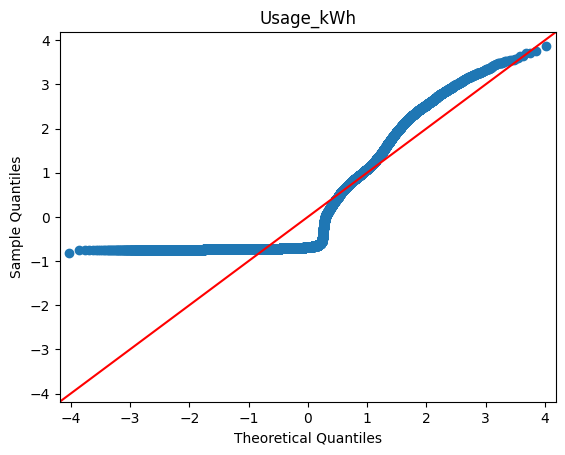

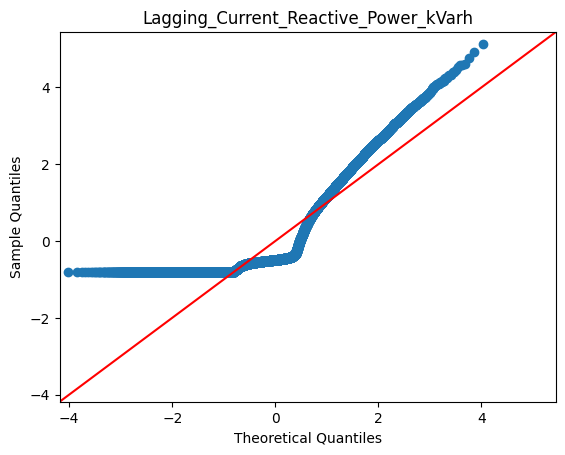

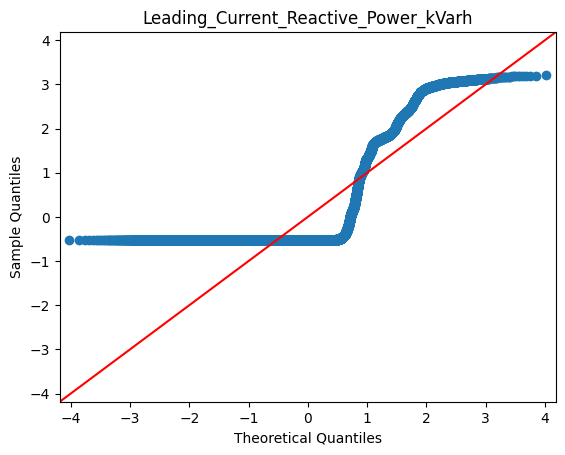

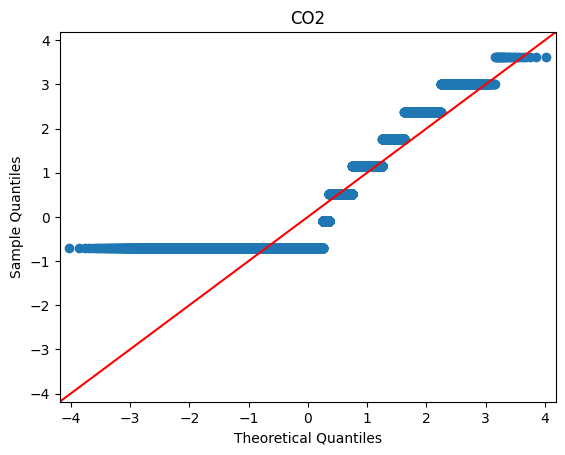

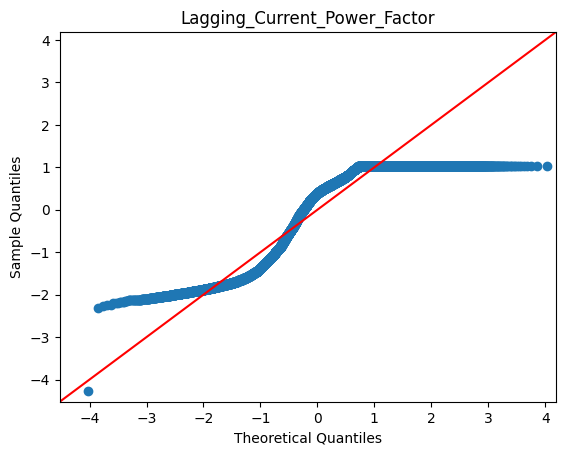

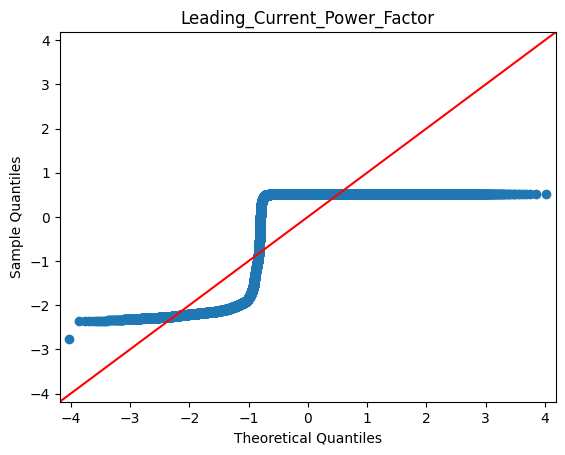

In [77]:
# check normality of df_num by qq plot


for col in df_or.columns:
    sm.qqplot(df_or[col], line ='45', fit = True)
    plt.title(col)
    plt.show()

In [74]:
# plotly monthly average values against month of df_num
import plotly.express as px

df_temp = df_num.copy()

df_temp = df_temp.groupby(df_temp.index.month).mean()

px.line(df_temp)

In [75]:
display(df_daily.loc[df_daily.index.month <= 6, 'Usage_kWh'].describe())
display(df_daily.loc[df_daily.index.month > 6, 'Usage_kWh'].describe())

NameError: name 'df_daily' is not defined

In [102]:
df.loc[df.index.month <= 6, 'Usage_kWh'].describe()

count    17376.000000
mean        29.995382
std         35.355104
min          2.480000
25%          3.420000
50%          5.130000
75%         54.510000
max        153.140000
Name: Usage_kWh, dtype: float64

In [103]:
df.loc[df.index.month <= 6, 'Usage_kWh'].describe()

count    17376.000000
mean        29.995382
std         35.355104
min          2.480000
25%          3.420000
50%          5.130000
75%         54.510000
max        153.140000
Name: Usage_kWh, dtype: float64

In [104]:
df.loc[df.index.month > 6, 'Usage_kWh'].describe()

count    17664.000000
mean        24.820932
std         31.240971
min          0.000000
25%          3.020000
50%          4.000000
75%         49.030000
max        157.180000
Name: Usage_kWh, dtype: float64

In [105]:
df['Load_Type'].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

In [106]:
df.loc[df['WeekStatus'] == 'Weekday', 'Usage_kWh'].describe()

count    25056.000000
mean        33.624727
std         35.624802
min          0.000000
25%          3.460000
50%          7.600000
75%         58.727500
max        157.180000
Name: Usage_kWh, dtype: float64

In [107]:
df.loc[df['WeekStatus'] == 'Weekday', 'Usage_kWh'].describe()

count    25056.000000
mean        33.624727
std         35.624802
min          0.000000
25%          3.460000
50%          7.600000
75%         58.727500
max        157.180000
Name: Usage_kWh, dtype: float64

In [108]:
df.loc[df['WeekStatus'] == 'Weekend', 'Usage_kWh'].describe()

count    9984.000000
mean       11.732327
std        19.947867
min         2.450000
25%         3.020000
50%         3.460000
75%         4.820000
max       133.420000
Name: Usage_kWh, dtype: float64

In [109]:
df['WeekStatus'].value_counts()

WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64

In [110]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000


In [111]:
df.dtypes

Usage_kWh                               float64
Lagging_Current_Reactive_Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2                                     float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [112]:
# check nan values in columns
df.isnull().sum()

Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [113]:
len(df_num)

35040

In [114]:
df['Leading_Current_Power_Factor'].value_counts()

Leading_Current_Power_Factor
100.00    24430
99.99       454
99.98       207
99.97       114
99.96       111
          ...  
15.81         1
49.79         1
93.43         1
32.26         1
31.65         1
Name: count, Length: 3366, dtype: int64

<Axes: >

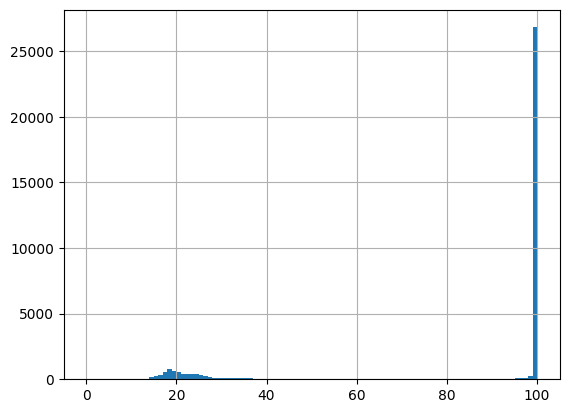

In [115]:
df['Leading_Current_Power_Factor'].hist(bins = 100)

In [116]:
# check zero values
for col in df.columns:
    print(col, (df[col] == 0).sum())

Usage_kWh 1
Lagging_Current_Reactive_Power_kVarh 7194
Leading_Current_Reactive_Power_kVarh 23610
CO2 20990
Lagging_Current_Power_Factor 1
Leading_Current_Power_Factor 1
WeekStatus 0
Day_of_week 0
Load_Type 0


In [117]:
# check zero values at daily level
for col in df_daily.columns:
    print(col, (df_daily[col] == 0).sum())

Usage_kWh 0
Lagging_Current_Reactive_Power_kVarh 0
Leading_Current_Reactive_Power_kVarh 0
CO2 56
Lagging_Current_Power_Factor 0
Leading_Current_Power_Factor 0
NSM 0


In [118]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Assuming df_num is your DataFrame and it has been defined earlier
X = df_num.drop('Usage_kWh', axis=1)
y = df_num['Usage_kWh']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.462e+05
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:43:48   Log-Likelihood:                 18963.
No. Observations:               35040   AIC:                        -3.791e+04
Df Residuals:                   35034   BIC:                        -3.786e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [119]:
df_num.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'],
      dtype='object')

In [120]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Assuming df_num is your DataFrame and it has been defined earlier
# Define the formula for the linear regression model
formula = 'Usage_kWh ~ ' + ' + '.join(df_num.columns.difference(['Usage_kWh']))

# Fit the model using the formula API
model = smf.ols(formula, data=df_num).fit()

# Print the summary of the model
print(model.summary())

# Get the ANOVA table
anova_table = sms.anova_lm(model, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.462e+05
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:43:48   Log-Likelihood:                 18963.
No. Observations:               35040   AIC:                        -3.791e+04
Df Residuals:                   35034   BIC:                        -3.786e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [121]:
# print 

In [122]:
df_num['Usage_kWh'].mean()

1.2653500773810003e-16

In [123]:
df_num

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor
date,,,,,,
2018-01-01 00:15:00,-0.724095,-0.618508,-0.521378,-0.71354,-0.389405,0.513260
2018-01-01 00:30:00,-0.699277,-0.525904,-0.521378,-0.71354,-0.729762,0.513260
2018-01-01 00:45:00,-0.722002,-0.598270,-0.521378,-0.71354,-0.544257,0.513260
2018-01-01 01:00:00,-0.719908,-0.581098,-0.521378,-0.71354,-0.659999,0.513260
2018-01-01 01:15:00,-0.704659,-0.523450,-0.521378,-0.71354,-0.838105,0.513260
...,...,...,...,...,...,...
2018-12-31 23:00:00,-0.703762,-0.501373,-0.521378,-0.71354,-0.976573,0.513260
2018-12-31 23:15:00,-0.707051,-0.570059,-0.521378,-0.71354,-0.521531,0.513260
2018-12-31 23:30:00,-0.705855,-0.605016,-0.511949,-0.71354,-0.209185,0.512604


## Divide the data into 2 populations